In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')


In [2]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# Criando nosso DataFrame
df = pd.read_excel('AdventureWorks.xlsx')

In [4]:
# Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
# Visualizando as 5 ultimas linhas
df.tail()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black
903,2008-12-21,2008-12-25,306,1155,19060,200812214CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black


In [6]:
# quantidade de linhas e colunas
#shape SEM PARENTESES
df.shape

(904, 16)

In [7]:
# verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
# Qual a receita total?
df['Valor Venda'].sum()

5984606.1426

In [9]:
# Qual o custo Total?
df['custo'] = df['Custo Unitário'].mul(df['Quantidade']) # criando a coluna de custo

In [10]:
# Qual o custo total?
df['Valor Venda'].sum()

5984606.1426

In [11]:
# Qual o custo total?
# Usando o método round, podemos arrendondar para 2 casas decimais 
round(df['Valor Venda'].sum(), 2)

5984606.14

In [12]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [13]:
# Agora que temos a receita e custo e o total, podemos achar o lucro total
# Vamos criar uma coluna de Lucro que será Receita - Custo
df['lucro'] = df['Valor Venda'] - df ['custo']

In [14]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [15]:
# Total Lucro
round(df['lucro'].sum(), 2)

3497823.09

In [16]:
# Criando uma coluna com total de dias para enviar o produto
df['Tempo_envio'] = df['Data Envio'] - df['Data Venda']

In [17]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days




AGORA, QUEREMOS SABER A MÉDIA DO TEMPO DE ENVIO PARA CADA MARCA, E PARA ISSO PRECISAMOS TRANSFORMAR A COLUNA TEMPO_ENVIO EM NÚMERICA



In [18]:
# Extraindo apenas os dias
df['Tempo_envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [19]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7


In [20]:
# Verificando o tipo da coluna Tempo_envio
df['Tempo_envio'].dtype

dtype('int64')

In [21]:
# Média do tempo de envio por Marca
df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

MISSION VALUES

In [22]:
# Verificando se temos dados faltantes

In [23]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

E, se a gente quiser saber o Lucro por Ano e por Marca?

In [24]:
# Vamo agrupar por ano e marca
# repare que o valor ficou em notação cientifica
df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [25]:
# para tranformar de notação cientifica para o formato real usamos o comando abaixo
pd.options.display.float_format = '{:20,.2f}'.format

In [26]:
# Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [27]:
# Qual o total de produtos vendidos?
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

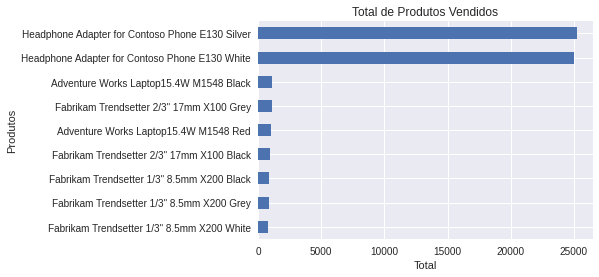

In [28]:
# Gráfico Total de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh(title='Total de Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produtos');

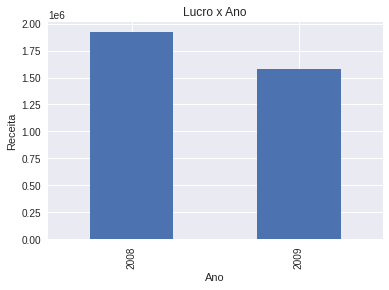

In [29]:
# lucro por ano
df.groupby(df['Data Venda'].dt.year)['lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [30]:
df.groupby(df['Data Venda'].dt.year)['lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [31]:
# selecionando apenas as vendas de 2009
df_2009 = df[(df['Data Venda'].dt.year) == 2009]

In [32]:
df_2009.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


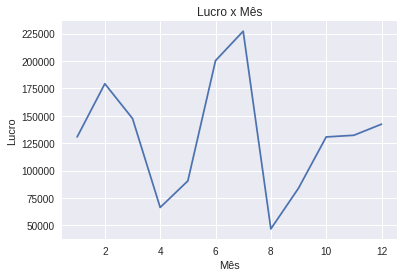

In [33]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot(title='Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro');

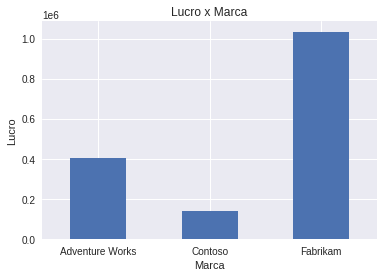

In [34]:
df_2009.groupby('Marca')['lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

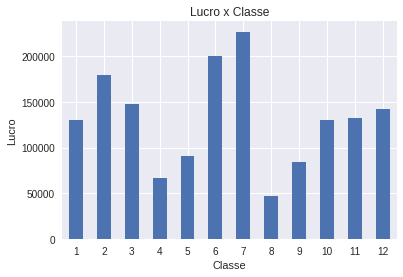

In [35]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [36]:
df['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

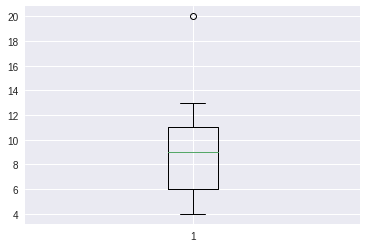

In [37]:
# Gráfico de Boxplot
# repare que existe um ponto destoante, isto pode representar um erro de lançameto ou um fato relevante
plt.boxplot(df['Tempo_envio']);

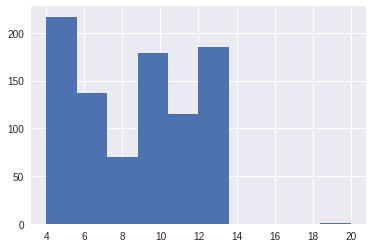

In [38]:
# Histograma
plt.hist(df['Tempo_envio']);

In [39]:
# Tempo minimo de envio
df['Tempo_envio'].min()

4

In [40]:
# Tempo maximo de envio
df['Tempo_envio'].max()

20

In [41]:
# Identificando o Outlier
df[df['Tempo_envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


**Agradecimentos a DIO e a Professora Fernanda Santos**,
*pelos ensinamos do projeto para Análise de dados com Python e Pandas. texto em itálico*